<a href="https://colab.research.google.com/github/mgraves236/neural-networks/blob/main/Sieci_neuronowe_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projekt ten ma na celu stworzenie architektury sieci neuronowej oraz wytrenowanie jej wraz z doborem hiperparametrów tak, aby osiągnąć możliwie największe wartości wskazanych metryk.

Wykorzystywany dataset: https://www.kaggle.com/datasets/alessiocorrado99/animals10/data

26 191 elementów

In [ ]:
# Potrzebne biblioteki

import pathlib
import PIL.Image as Image
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras

from keras.models import Sequential
import time

import tensorflow as tf

# 1. Pobranie danych

In [5]:
# Usuwanie istniejących folderów

!rm -rf sample_data

# Pobranie danych i wyodrębnienie ich

!wget https://www.dropbox.com/scl/fi/umlj0h521cc9rzeht1qyc/Animals.zip?rlkey=fsdj4wxjov41er8a08md0o6pi&dl=0
!unzip /content/Animals.zip?rlkey=fsdj4wxjov41er8a08md0o6pi

Streaming output truncated to the last 5000 lines.
  inflating: Animals/images/spider/OIP-E5zolQnxkNZoglB9Da8OHAHaE7.jpeg  
  inflating: Animals/images/spider/OIP-e6H3_aCtzXyxuExfwTHcVwHaE8.jpeg  
  inflating: Animals/images/spider/OIP-e6iXA-V3QbOBiNsPY-TfSQHaFj.jpeg  
  inflating: Animals/images/spider/OIP-E89tGEuaZ4wzBvIYvxOEjAHaGL.jpeg  
  inflating: Animals/images/spider/OIP-E-8HCNdrTI2Q-ujYynhRIgHaGZ.jpeg  
  inflating: Animals/images/spider/OIP-e8qNiF8Wvmqb-k9kucrzfAHaF4.jpeg  
  inflating: Animals/images/spider/OIP-e8x0rOA9DEq3agEGbUdwawHaFj.jpeg  
  inflating: Animals/images/spider/OIP-e98qfAwKXAhDWF2DGtrA7gHaFj.jpeg  
  inflating: Animals/images/spider/OIP-e9IDQCZespp1d4zQTNH-lwHaFj.jpeg  
  inflating: Animals/images/spider/OIP-e9Mz3MvWwYqtYwC8bsmxIAHaF0.jpeg  
  inflating: Animals/images/spider/OIP-E9NM2O8ncDHm_M0iuVpfUgHaFj.jpeg  
  inflating: Animals/images/spider/OIP-e9UXRB7FVnKMmSaOmi__FwHaEw.jpeg  
  inflating: Animals/images/spider/OIP-Ea0THN3uA_gVU7hRslUPgQEBDy.jpeg  


# 2. Przygotowanie danych

In [ ]:
# Sprawdzenie ilości obrazów w folderach

ROOT_DIR = "/content/Animals/images"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('dog', 4863), ('spider', 4821), ('horse', 2623), ('cow', 1866), ('cat', 1668), ('squirrel', 1862), ('sheep', 1820), ('elephant', 1446), ('chicken', 3098), ('butterfly', 2112)])

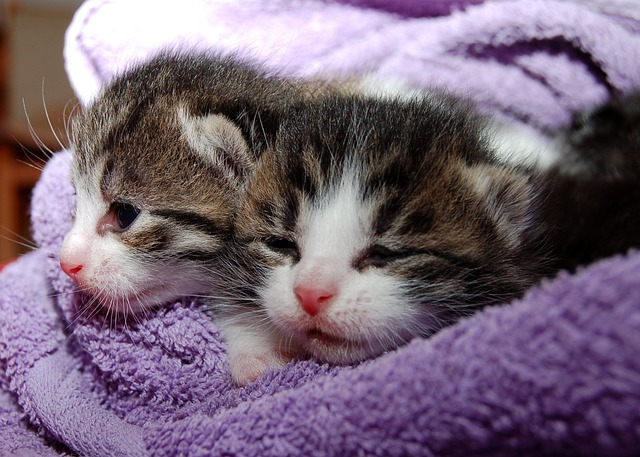

In [ ]:
# Wyświetlenie przykładowego obrazu

data_dir='/content/Animals/images'
path_dir=pathlib.Path(data_dir)
sample_img=list(path_dir.glob('cat/*'))[6]
Image.open(sample_img)

# 3.1 Wybrany model - VGG16

https://www.kaggle.com/code/atishaygwari/transfer-learning-vgg16-93

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size']=14

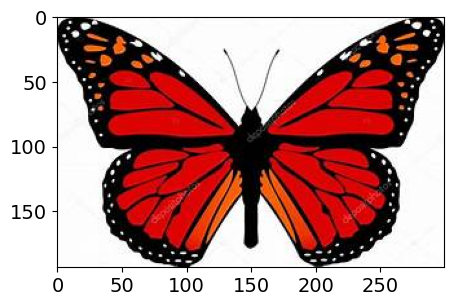

In [7]:
from glob import glob #retriving an array of files in directories
path_train = "/content/Animals/images/butterfly"
img = glob(path_train+"/*.jpeg")
# print(img)
img = np.asarray(plt.imread(img[0]))
plt.figure(figsize = (5 , 5))
plt.imshow(img)

In [8]:
img_size=250
batch_size=32
directory='/content/Animals/images'

# horizontal flip i zoom

traingen=ImageDataGenerator(rescale=1/255.,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           validation_split=.15)

traindata=traingen.flow_from_directory(directory,
                                       target_size=(img_size,img_size)
                                       ,batch_size=batch_size,
                                       shuffle=True,class_mode='categorical',
                                      subset='training')


valdata=traingen.flow_from_directory(directory,
                                    shuffle=False,batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode="categorical",subset='validation')

Found 22257 images belonging to 10 classes.
Found 3922 images belonging to 10 classes.


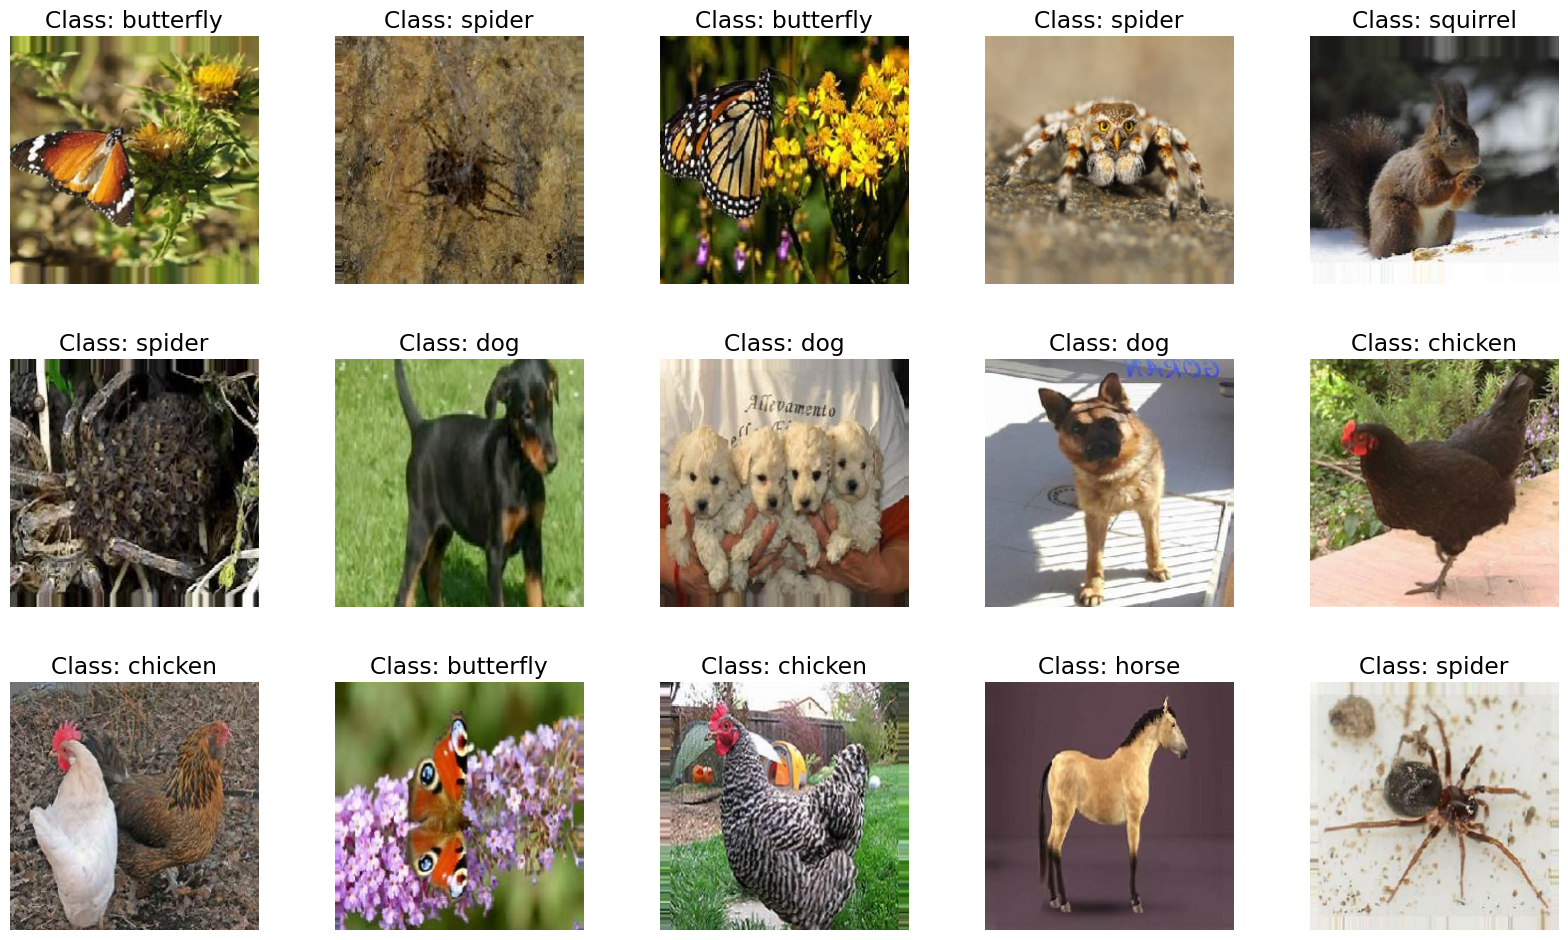

In [9]:
labels=[key for key in traindata.class_indices]
samples=traindata.__next__()
images=samples[0]
target=samples[1]
plt.rcParams['figure.figsize']=(20,20)

for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[np.argmax(target[i],axis=0)]}")
    plt.axis('off')

In [10]:
img_size=224
model=tf.keras.applications.vgg16.VGG16(include_top=False,
                                             weights='imagenet',
                                             input_shape=(img_size,img_size,3))

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
# freezujemy 4 ostatnie warstwy modelu

for layer in model.layers[:-4]:
    layer.trainable=False

In [13]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
from tensorflow.keras.optimizers import Adam
last_output = model.output
x = GlobalAveragePooling2D()(last_output)
x = Dense(128,activation="relu")(x)
x = Dense(512,activation="relu")(x)
outputs = Dense(10,activation="softmax")(x) # zmieniamy na 10 kategorii bo 10 zwierzatek
model = Model(inputs=model.inputs,outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model_name = "model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)



earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [20]:
history = model.fit(traindata,epochs=15,validation_data=valdata,callbacks=[checkpoint,earlystopping])

Epoch 1/15
  4/696 [..............................] - ETA: 5:28:11 - loss: 2.1374 - accuracy: 0.2422

KeyboardInterrupt: ignored

In [18]:
# model = tf.keras.models.load_model("/kaggle/working/model.h5")

OSError: ignored

# 4.1 Wyniki dla VGG

In [19]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: ignored

<Figure size 2000x800 with 0 Axes>

In [ ]:
y_test = valdata.classes
y_pred = model.predict(valdata)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,target_names = labels))

# 3.2 Wybrany model - MobileNetV3

https://towardsdatascience.com/transfer-learning-using-mobilenet-and-keras-c75daf7ff299

In [ ]:
# nie wszystkie potrzebne
import keras
from keras import backend as K
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [ ]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:
preprocessed_image = prepare_image('/content/Animals/images/cat/100.jpeg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 1s 549ms/step


[[('n02124075', 'Egyptian_cat', 0.77930963),
  ('n02123045', 'tabby', 0.20108724),
  ('n02123159', 'tiger_cat', 0.018129412),
  ('n02127052', 'lynx', 0.00081075146),
  ('n02119789', 'kit_fox', 0.00013540892)]]